In [1]:
import GPy
import pandas as pd
import sklearn_ardregression
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.rcParams["font.size"] = 18

In [2]:
# 訓練データ
TRAIN_DATA_SIZE = 100
train_xs, train_ys = sklearn_ardregression.make_dataset(TRAIN_DATA_SIZE)
train_xs, train_ys = sklearn_ardregression.normalize(train_xs, train_ys)
train_ys = train_ys[:, np.newaxis]

In [3]:
print(train_ys.shape, train_xs.shape)
n_features = train_xs.shape[1]
print(n_features)

(100, 1) (100, 3)
3


In [4]:
# カーネルを定義する。
kernel = GPy.kern.RBF(input_dim=n_features, variance=0.01, ARD=True)
# kernel = GPy.kern.Matern52(n_features, ARD=True)

# ガウス過程を用いた回帰を行う。
model = GPy.models.GPRegression(train_xs, train_ys, kernel)

# 最適化（MAP推定）を行う。
model.optimize(messages=True, max_iters=1e5)

A Jupyter Widget

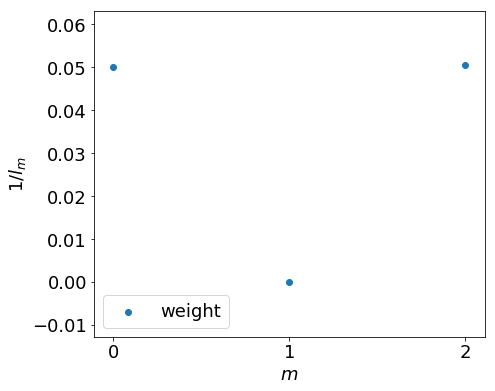

In [5]:
# 学習後のスケール長を取り出す。
ls = list(model.kern.lengthscale)

# その逆数が説明変数の寄与の大きさ
weights = [1 / v for v in ls]

plt.figure(figsize=(7, 6))
plt.ylabel("$1/l_m$")
plt.xlabel("$m$")
xs = list(range(len(weights)))
plt.scatter(xs, weights, marker="o", label="weight")
plt.xticks([0, 1, 2])
plt.legend(loc="lower left")
if not os.path.isdir("./gp_images"):
    os.mkdir("./gp_images")
plt.savefig("./gp_images/weights.jpg")
plt.show()

In [6]:
# 訓練後の精度を見る。
train_pred_mean, train_pred_var = model.predict(train_xs)
train_pred_std = train_pred_var ** 0.5

# 誤差を計算する。
abs_errors = np.abs(train_ys - train_pred_mean)

# 誤差の絶対値の平均値と標準偏差
mean_abs_errors = np.mean(abs_errors)
std_abs_errors = np.std(abs_errors)
print("差分の絶対値の平均値: {}".format(mean_abs_errors))
print("差分の絶対値の標準偏差: {}".format(std_abs_errors))

差分の絶対値の平均値: 4.648543963323045e-06
差分の絶対値の標準偏差: 4.008840791500201e-06


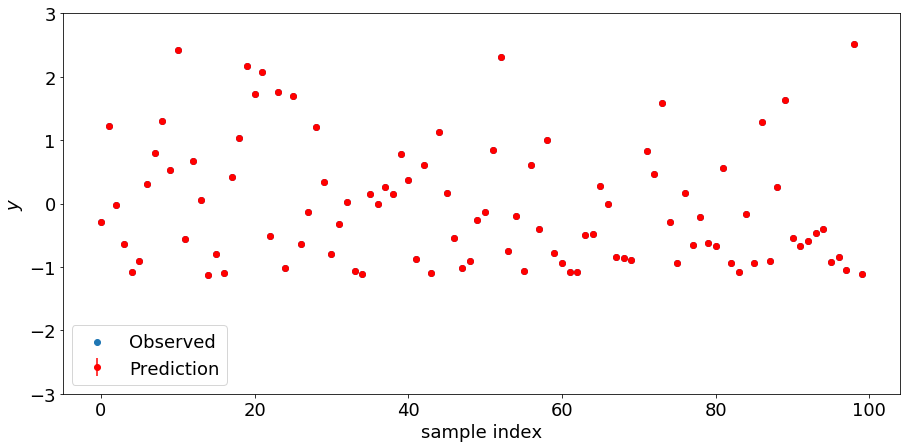

In [7]:
# 訓練データの一致度合いを見る。

plt.figure(figsize=(15, 7))
xs = range(train_pred_mean.shape[0])

plt.scatter(xs, train_ys, marker="o", label="Observed")

plt.xlabel("sample index")
plt.ylabel("$y$")
plt.ylim(-3, 3)
plt.errorbar(xs, train_pred_mean, train_pred_std, fmt="ro", label="Prediction", marker="o")
plt.legend(loc="best")
plt.show()

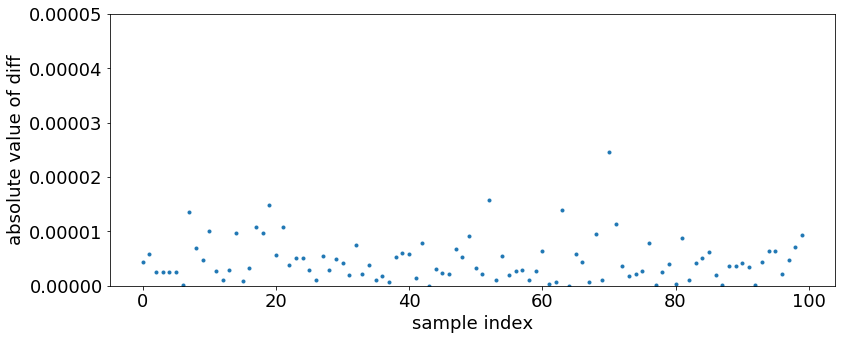

In [8]:
# 差の絶対値

plt.figure(figsize=(13, 5))
size = abs_errors.shape[0]
xs = list(range(size))
plt.ylim(0, 0.00005)
plt.scatter(xs, abs_errors, marker=".")
plt.xlabel("sample index")
plt.ylabel("absolute value of diff")
plt.show()

In [9]:
# テストデータ
TEST_DATA_SIZE = 30
test_xs, test_ys = sklearn_ardregression.make_dataset(TEST_DATA_SIZE)
test_xs, test_ys = sklearn_ardregression.normalize(test_xs, test_ys)
test_ys = test_ys[:, np.newaxis]

In [10]:
pred_mean, pred_var = model.predict(test_xs)
pred_std = pred_var ** 0.5

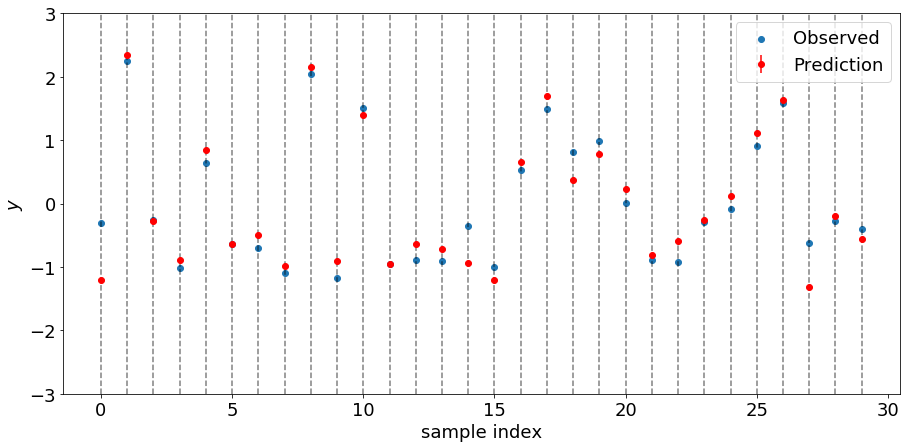

In [11]:
plt.figure(figsize=(15, 7))
xs = range(pred_mean.shape[0])
plt.scatter(xs, test_ys, marker="o", label="Observed")
plt.vlines(list(range(TEST_DATA_SIZE)), ymin=-3, ymax=3, linestyle="dashed", alpha=0.5)
plt.xlabel("sample index")
plt.ylabel("$y$")
plt.ylim(-3, 3)
plt.errorbar(xs, pred_mean, pred_std, fmt="ro", label="Prediction", marker="o")
plt.legend(loc="best")
plt.savefig("./gp_images/predictions.jpg")
plt.show()

In [12]:
# 差の絶対値の平均値と標準偏差

abs_errors = np.abs(test_ys - pred_mean)
print(abs_errors.shape)
mean_abs_errors = np.mean(abs_errors)
std_abs_errors = np.std(abs_errors)
print("差分の絶対値の平均値: {}".format(mean_abs_errors))
print("差分の絶対値の標準偏差: {}".format(std_abs_errors))

(30, 1)
差分の絶対値の平均値: 0.21189267379417673
差分の絶対値の標準偏差: 0.19968656263665344


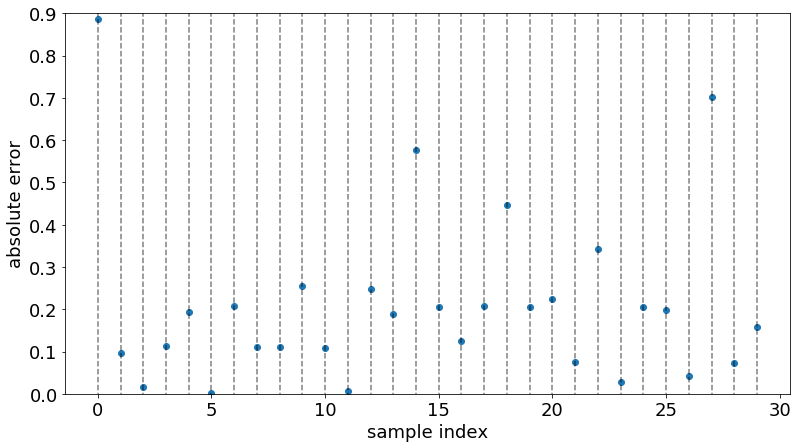

In [13]:
plt.figure(figsize=(13, 7))
size = abs_errors.shape[0]
xs = list(range(size))
plt.scatter(xs, abs_errors, marker="o")
plt.vlines(list(range(TEST_DATA_SIZE)), ymin=-0.5, ymax=0.9, linestyle="dashed", alpha=0.5)
plt.ylim(0, 0.9)
plt.xlabel("sample index")
plt.ylabel("absolute error")
plt.show()

In [14]:
np.abs(test_ys[20] - pred_mean[20]) /test_ys[20]

array([34.49053236])

In [15]:
print(test_ys[20], pred_mean[20])

[0.00649453] [0.23049417]
